In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# standardization and training the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Encoding the text data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# working on Titanic dataset which is a classification problem.

In [2]:
df = pd.read_csv("/Users/juhimishra/Downloads/dataset1-master 3/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


observation for titanic data mentioned below :
1. categorical columns = sex,cabin and embarked
2. continous columns = passengerid,Survived,Pclass,Age,ticket,fare,sibsp,parch
3. Name is a nominal data so will delete this as we here we need to predict if passenger survived from sinking or not

SibSp = siblings
Parch = No of parents or child aboared
So with this data we can assume that there are families travelling on the ship and it's obviuos that parent and child will be in one cabin alloted.
so we need to check our missing data accordingly

# EDA

In [3]:
df.nunique().to_frame('Unique Values')

,Unique Values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


We got the count of all the column using nunique method and from the above we can assume clearly there are missing values in some of the columns.

In [4]:
df.shape

(891, 12)

Total no of rows are 891 and column is 12 

In [6]:
## checking the static data for more clarification
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As here most of the columns are categorical and we don't treat any skewness or outliers for those columns. and above we got static values only for continous data
let's check any missing values are there in categorical colun or not

In [7]:
df.isna().sum().to_frame('Any missing value')

,Any missing value
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


as per the above data we are having missing value in age,embarked and cabin

In [8]:
# % of age missing values
(177/891)*100

19.865319865319865

In [9]:
# Cabin missing values
(687/891)*100

77.10437710437711

as the percentage of cabin missing values are more that 75% so dropping cabin column

In [10]:
df1=df.drop(['Cabin'],axis = 1)

In [11]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Let's see the count of total male and female

In [13]:
df1[df1["Sex"].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Embarked       312
dtype: int64

total no of female on cruise aboared are 314 . no of age and embarked are less due to missing values

In [15]:
df1[df1['Sex'].str.match("male")].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Embarked       577
dtype: int64

total no of male on cruise aboared are 577 . no of age are less due to missing values. Here we can see likewise in female having missng value in embarked 
don't have the same in male that means 2 female embarked data are missing

as we can see that count of male is more than female. Lets see the same in plot 

<AxesSubplot:xlabel='Survived', ylabel='count'>

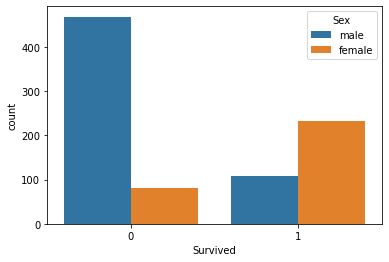

In [16]:
sns.countplot(x='Survived', hue='Sex', data=df)

Encoding using label encoder done for sex, ticket and embarked column as system will not understand object data so converting the same to integer

In [17]:
le = LabelEncoder()

In [19]:
df2 = le.fit_transform(df['Embarked'])
pd.Series(df2)

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int64

In [20]:
df1['Embarked'] = df2

In [22]:
df3 = le.fit_transform(df1['Sex'])
pd.Series(df3)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int64

In [23]:
df1['Sex']=df3

In [25]:
df4 = le.fit_transform(df1['Ticket'])
pd.Series(df4)

0      523
1      596
2      669
3       49
4      472
      ... 
886    101
887     14
888    675
889      8
890    466
Length: 891, dtype: int64

In [26]:
df1['Ticket']=df4

In [27]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,0


dropping name column as name is not so important for what we are predicting here. So instead of converting it to integer 
dropping the column 

In [46]:
df1.drop(['Name'],axis = 1,inplace = True)

embarked are having total 4 classes

In [30]:
df1['Embarked'].unique()

array([2, 0, 1, 3])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

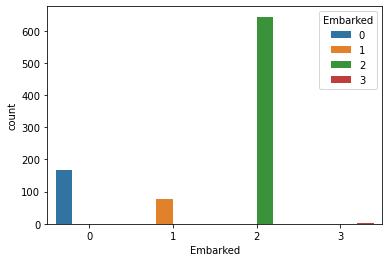

In [31]:
sns.countplot(x = 'Embarked',hue = 'Embarked',data = df1)

Filling missing values using mean and mode method in age and embarked column respectively as age is a continous column so using mean method for the same and embarked is a categorical column so using mode method

In [39]:
df1['Age']=df1['Age'].replace(np.NaN,df1['Age'].mean())
df1['Embarked']=df1['Embarked'].replace(df1['Embarked'].mode())

Missing values adjusted

In [40]:
df1.isnull().sum().to_frame('Total count')

,Total count
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 76.7+ KB


As there are no null values so we can proceed further to check skewness present in data or not.

In [44]:
df1.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -2.707403
dtype: float64

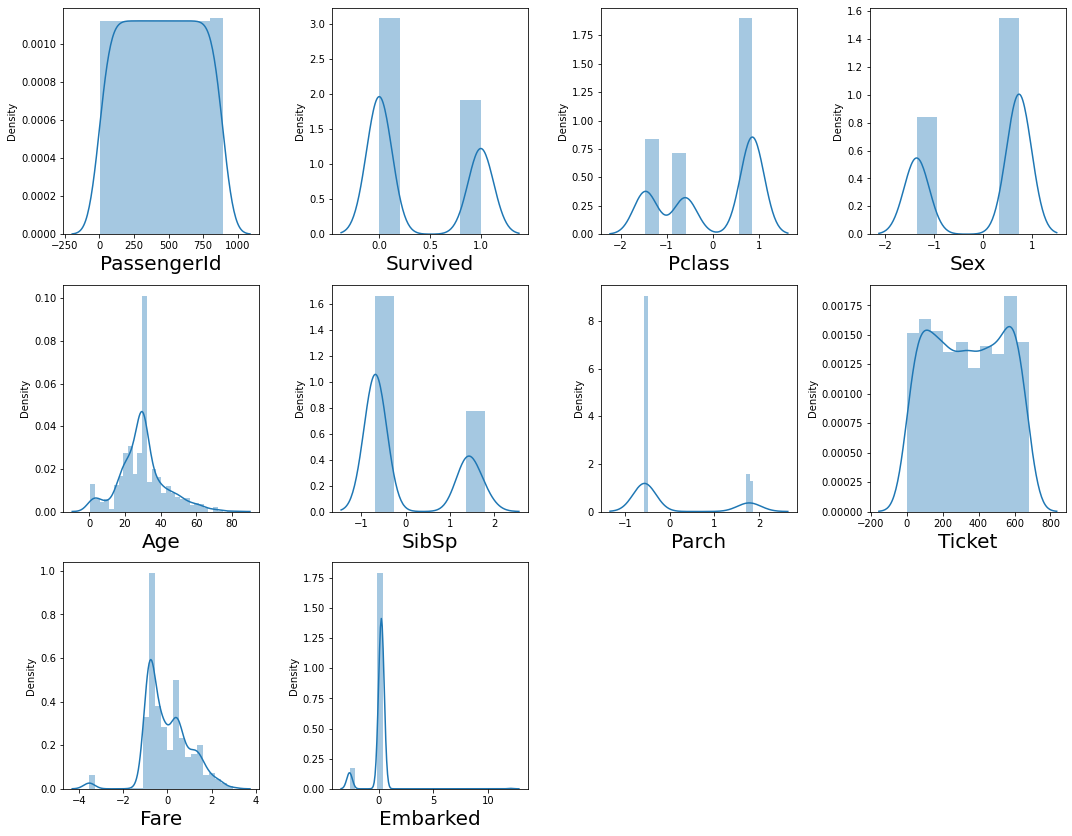

In [56]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df1:
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

we can see that there are lot many skewness but most of our column are categorical column so no need to treat skewness for those.
1. continous columns = passengerid,Survived,Pclass,Age,ticket,fare,sibsp,parch

In [49]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [62]:
feature =['PassengerId', 'Survived', 'Pclass','Age', 'SibSp', 'Parch',
       'Ticket', 'Fare']

Treating skewness for those columns which are skewed using power transformer method

In [63]:
from sklearn.preprocessing import PowerTransformer

In [64]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [65]:
df1[feature] = scaler.fit_transform(df1[feature].values)

In [66]:
df1.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.301426
Sex           -0.618921
Age            0.434488
SibSp          0.785906
Parch          1.225711
Ticket         0.000246
Fare          -0.196511
Embarked       2.165006
dtype: float64

In [74]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

as count shows that this data is not an imbalance data 

# Preprocessing 

In [75]:
## Splitting target and feature variable into x and y
x = df1.drop(columns=['Survived'])
y= df['Survived']

Splitting feature and column for preprocessing and scaling . Here x is feature and y is target

In [77]:
scaler = standardScaler()
scaler.fit_transform(x)
x_scaler

array([[-1.73010796,  0.88769297,  0.73769513, ...,  0.91896631,
        -0.87719558,  0.2267682 ],
       [-1.72622007, -1.33885782, -1.35557354, ...,  1.28262456,
         1.32171671,  0.2267682 ],
       [-1.72233219,  0.88769297, -1.35557354, ...,  1.64628282,
        -0.78560514,  0.2267682 ],
       ...,
       [ 1.72233219,  0.88769297, -1.35557354, ...,  1.67617254,
         0.30470989,  0.2267682 ],
       [ 1.72622007, -1.33885782,  0.73769513, ..., -1.64656796,
         0.53959381,  0.2267682 ],
       [ 1.73010796,  0.88769297,  0.73769513, ...,  0.63501397,
        -0.80858009, -2.70246093]])

In [105]:
# Importing all necessary metrics for further steps 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,plot_roc_curve
from sklearn.metrics import classification_report

In [80]:
maxaccu = 0
maxrs = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)
        

Best Accuracy score is: 0.8171641791044776 On Random state:  425


In [70]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [83]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       154
           1       0.82      0.59      0.68       114

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.75       268
weighted avg       0.78      0.77      0.76       268



In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.7856631724311092


In [86]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.84      0.69      0.76       114

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.81      0.81       268



In [87]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8294645659406189


In [88]:
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.73      0.82      0.78       154
           1       0.72      0.60      0.65       114

    accuracy                           0.73       268
   macro avg       0.72      0.71      0.71       268
weighted avg       0.73      0.73      0.72       268



In [89]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7364195593496956


In [90]:
knc.fit(x_train,y_train)
pred = knc.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       154
           1       0.80      0.63      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [91]:
print(cross_val_score(knc,x,y,cv=5).mean())

0.5745904211913879


As per the above score our best model is  RandomForestClassifier so will do hyperparameter tuning on RandomForestClassifier using GridSearchCV

# HyperParameter Tuning

In [93]:
# RandomForestClassifier
param = {'n_estimators':[100,700],
        'criterion':['gini','entropy'],
        'max_depth':[2,3,4,5,6],
        'max_features':['auto','sqrt','log2']}

In [94]:
GC = GridSearchCV(rfc,param,cv=5)

In [95]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 700]})

In [96]:
GC.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [97]:
final_rfc = RandomForestClassifier(criterion = 'entropy',max_depth = 5, max_features = 'sqrt',n_estimators = 100)
final_rfc.fit(x_train,y_train)
pred = final_rfc.predict(x_test)
acc = accuracy_score(pred,y_test)
print(acc*100)

80.59701492537313


Checking score using roc_auc_curve and even plotting the same using visualization method

In [100]:
# Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.7451583504215084

In [101]:
# RandomForestClassifier
roc_auc_score(y_test,rfc.predict(x_test))

0.7977899293688768

In [102]:
# DecisionTreeClassifier
roc_auc_score(y_test,dtc.predict(x_test))

0.7105832763727501

In [103]:
# KNeighborsClassifier
roc_auc_score(y_test,knc.predict(x_test))

0.7573479152426521

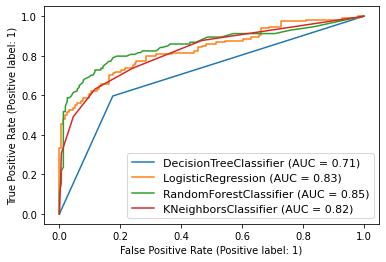

In [106]:
disp = plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax = disp.ax_) # ax = axes with confusion mtrix

plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)

plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)

plt.legend(prop={'size':11}, loc = 'lower right')

plt.show()

As per roc_auc_curve too our best model is randomforestclassifier

# Saving the model

In [108]:
import joblib
joblib.dump(final_rfc,'Finalmodeltitanic.pk1')

['Finalmodeltitanic.pk1']